In [0]:
import imutils
import cv2

In [16]:
# Load the Drive helper and mount
from google.colab import drive

# This will prompt for authorization.
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [0]:
import numpy as np
import pandas as pd

In [0]:
a = 'drive/My Drive/MobileNetSSD_deploy.prototxt.txt'
b = 'drive/My Drive/MobileNetSSD_deploy.caffemodel'
net = cv2.dnn.readNetFromCaffe(a,b)
train_pd = pd.read_csv('drive/My Drive/FlipKart_Grid/training.csv')
test_pd = pd.read_csv('drive/My Drive/FlipKart_Grid/test.csv')

In [0]:
frame = cv2.imread('drive/My Drive/FlipKart_Grid/train/JPEG_20161209_144221_1000965510278.png')
(h, w) = frame.shape[:2]


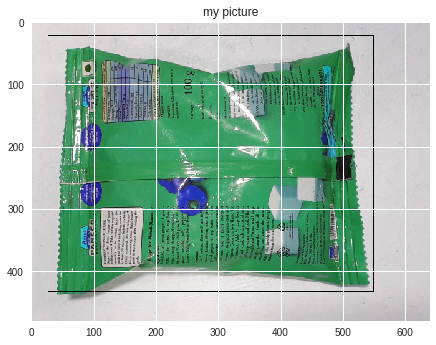

[27, 21, 549, 432]

In [20]:
frame = cv2.imread('drive/My Drive/FlipKart_Grid/train/JPEG_20161129_143914_1000304878557.png')
(h, w) = frame.shape[:2]
blob = cv2.dnn.blobFromImage(cv2.resize(frame, (300, 300)),0.007843, (300, 300), 127.5)
net.setInput(blob)
detections = net.forward()
box = detections[0, 0, 0, 3:7] * np.array([w, h, w, h])
(startX, startY, endX, endY) = box.astype("int")
cv2.rectangle(frame, (startX, startY), (endX, endY),5)
from matplotlib import pyplot as plt
plt.imshow(frame)
plt.title('my picture')
plt.show()
[startX, startY, endX, endY]

In [0]:
ans_pd = pd.DataFrame(columns = ['image_name', 'x1', 'x2', 'y1', 'y2'])

In [23]:
for i in range(len(test_pd)):
  imgPath = 'drive/My Drive/FlipKart_Grid/test/'+test_pd.loc[i].image_name
  frame = cv2.imread(imgPath)
  (h,w) = frame.shape[:2]
  blob = cv2.dnn.blobFromImage(cv2.resize(frame, (300, 300)),0.007843, (300, 300), 127.5)
  net.setInput(blob)
  detections = net.forward()
  prob = []
  for t in range(detections.shape[2]):
    prob.append(detections[0,0,t,2])
  box_index = prob.index(max(prob))
  box = detections[0, 0, box_index, 3:7] * np.array([w, h, w, h])
  (startX, startY, endX, endY) = box.astype("int")
  ans_pd.loc[i] = [imgPath,startX,endX,startY,endY]
  print('row number',i)
  

row number 0
row number 1
row number 2
row number 3
row number 4
row number 5
row number 6
row number 7
row number 8
row number 9
row number 10
row number 11
row number 12
row number 13
row number 14
row number 15
row number 16
row number 17
row number 18
row number 19
row number 20
row number 21
row number 22
row number 23
row number 24
row number 25
row number 26
row number 27
row number 28
row number 29
row number 30
row number 31
row number 32
row number 33
row number 34
row number 35
row number 36
row number 37
row number 38
row number 39
row number 40
row number 41
row number 42
row number 43
row number 44
row number 45
row number 46
row number 47
row number 48
row number 49
row number 50
row number 51
row number 52
row number 53
row number 54
row number 55
row number 56
row number 57
row number 58
row number 59
row number 60
row number 61
row number 62
row number 63
row number 64
row number 65
row number 66
row number 67
row number 68
row number 69
row number 70
row number 71
ro

In [24]:
ans_pd.shape

(12815, 5)

In [0]:
def get_iou(a, b, epsilon=1e-5):
    
    x1 = max(a[0], b[0])
    y1 = max(a[2], b[2])
    x2 = min(a[1], b[1])
    y2 = min(a[3], b[3])

    width = (x2 - x1)
    height = (y2 - y1)
    
    if (width<0) or (height <0):
        return 0.0
    area_overlap = float(width * height)

    area_a = (a[1] - a[0]) * (a[3] - a[2])
    area_b = (b[1] - b[0]) * (b[3] - b[2])
    area_combined = area_a + area_b - area_overlap

    
    iou = float(area_overlap) /(area_combined+epsilon)
    return iou

In [0]:
result_pd = pd.DataFrame(columns = ['ans'])

In [0]:
results = []
for r in range(len(ans_pd)):
  take_a = [float(ans_pd.loc[r].x1),float(ans_pd.loc[r].x2),float(ans_pd.loc[r].y1),float(ans_pd.loc[r].y2)]
  take_b = [float(ans_pd.loc[r].ans_x1),float(ans_pd.loc[r].ans_x2),float(ans_pd.loc[r].ans_y1),float(ans_pd.loc[r].ans_y2)]
  take = get_iou(take_a,take_b)
  results.append(take)
  print(take,'-------------------',r)
  

0.8118956598813953 ------------------- 0
0.7995299124515207 ------------------- 1
0.8489532411173335 ------------------- 2
0.5105618016431159 ------------------- 3
0.4172760895842645 ------------------- 4
0.9241995247255488 ------------------- 5
0.8886836027236327 ------------------- 6
0.5230260374700154 ------------------- 7
0.793284161439358 ------------------- 8
0.45243510150687277 ------------------- 9
0.3012177875710414 ------------------- 10
0.716830853036488 ------------------- 11
0.32622722670918286 ------------------- 12
0.9092929051956061 ------------------- 13
0.9674951178715204 ------------------- 14
0.8855569871023842 ------------------- 15
0.5598670034660884 ------------------- 16
0.20283842974709002 ------------------- 17
0.44436652239055097 ------------------- 18
0.022895017072770626 ------------------- 19
0.9310729723432029 ------------------- 20
0.8581975602078797 ------------------- 21
0.5482415713946458 ------------------- 22
0.09286284871098774 ------------------- 

In [0]:
from statistics import mean
mean(results)

0.6548311509911321

In [0]:
final_pd = pd.DataFrame(data = results, columns = ['ans'])

In [0]:
error_pd = final_pd.loc[final_pd.ans <0.4]

In [0]:
len(error_pd)

3107

In [0]:
error_pd.index

Int64Index([   10,    12,    17,    19,    23,    28,    36,    37,    40,
               41,
            ...
            13946, 13947, 13971, 13975, 13977, 13980, 13983, 13989, 13991,
            13996],
           dtype='int64', length=3107)

In [0]:
!pip install 

ModuleNotFoundError: ignored

In [0]:
from keras_retinanet.models import load_model

ModuleNotFoundError: ignored

In [0]:
train_pd.loc[i].image_name

'JPEG_20160706_121146_1000145715002.png'

In [25]:
ans_pd

,image_name,x1,x2,y1,y2
0,drive/My Drive/FlipKart_Grid/test/147472384090...,232,448,89,411
1,drive/My Drive/FlipKart_Grid/test/147323147501...,17,626,276,482
2,drive/My Drive/FlipKart_Grid/test/JPEG_2016120...,129,494,53,461
3,drive/My Drive/FlipKart_Grid/test/JPEG_2016071...,129,494,53,461
4,drive/My Drive/FlipKart_Grid/test/JPEG_2016080...,88,637,9,462
5,drive/My Drive/FlipKart_Grid/test/147444974116...,2,355,10,475
6,drive/My Drive/FlipKart_Grid/test/JPEG_2016062...,82,627,10,475
7,drive/My Drive/FlipKart_Grid/test/JPEG_2016082...,57,446,43,391
8,drive/My Drive/FlipKart_Grid/test/148096595664...,130,643,7,478
9,drive/My Drive/FlipKart_Grid/test/147323489764...,18,638,3,477


In [0]:
ans_pd.to_csv(r'drive/My Drive/FlipKart_Grid/answer.csv')

In [27]:
!ls drive/My\ Drive/FlipKart_Grid

answer.csv  test  test.csv  train  training.csv


In [34]:
ans_pd.x1.loc[ans_pd.x1<0] = 0
ans_pd.x2.loc[ans_pd.x2<0] = 0
ans_pd.y1.loc[ans_pd.y1<0] = 0
ans_pd.y2.loc[ans_pd.y2<0] = 0

/usr/local/lib/python3.6/dist-packages/pandas/core/indexing.py:194: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)


In [0]:
ans_pd.to_csv(r'drive/My Drive/FlipKart_Grid/answer_1.csv')

In [35]:
ans_pd

,image_name,x1,x2,y1,y2
0,drive/My Drive/FlipKart_Grid/test/147472384090...,232,448,89,411
1,drive/My Drive/FlipKart_Grid/test/147323147501...,17,626,276,482
2,drive/My Drive/FlipKart_Grid/test/JPEG_2016120...,129,494,53,461
3,drive/My Drive/FlipKart_Grid/test/JPEG_2016071...,129,494,53,461
4,drive/My Drive/FlipKart_Grid/test/JPEG_2016080...,88,637,9,462
5,drive/My Drive/FlipKart_Grid/test/147444974116...,2,355,10,475
6,drive/My Drive/FlipKart_Grid/test/JPEG_2016062...,82,627,10,475
7,drive/My Drive/FlipKart_Grid/test/JPEG_2016082...,57,446,43,391
8,drive/My Drive/FlipKart_Grid/test/148096595664...,130,643,7,478
9,drive/My Drive/FlipKart_Grid/test/147323489764...,18,638,3,477


In [0]:
answer_pd = pd.read_csv('drive/My Drive/answer.csv')

In [43]:
answer_pd

,Unnamed: 0,image_name,x1,x2,y1,y2
0,0,drive/My Drive/FlipKart_Grid/test/147472384090...,232,448,89,411
1,1,drive/My Drive/FlipKart_Grid/test/147323147501...,17,626,276,482
2,2,drive/My Drive/FlipKart_Grid/test/JPEG_2016120...,129,494,53,461
3,3,drive/My Drive/FlipKart_Grid/test/JPEG_2016071...,129,494,53,461
4,4,drive/My Drive/FlipKart_Grid/test/JPEG_2016080...,88,637,9,462
5,5,drive/My Drive/FlipKart_Grid/test/147444974116...,2,355,10,475
6,6,drive/My Drive/FlipKart_Grid/test/JPEG_2016062...,82,627,10,475
7,7,drive/My Drive/FlipKart_Grid/test/JPEG_2016082...,57,446,43,391
8,8,drive/My Drive/FlipKart_Grid/test/148096595664...,130,643,7,478
9,9,drive/My Drive/FlipKart_Grid/test/147323489764...,18,638,3,477


In [44]:
answer_pd.x1.loc[ans_pd.x1<0] = -1*answer_pd.x1.loc[ans_pd.x1<0]
answer_pd.x2.loc[ans_pd.x2<0] = -1*answer_pd.x2.loc[ans_pd.x1<0]
answer_pd.y1.loc[ans_pd.y1<0] = -1*answer_pd.y1.loc[ans_pd.x1<0]
answer_pd.y2.loc[ans_pd.y2<0] = -1*answer_pd.y2.loc[ans_pd.x1<0]

/usr/local/lib/python3.6/dist-packages/pandas/core/indexing.py:194: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)


In [45]:
answer_pd

,Unnamed: 0,image_name,x1,x2,y1,y2
0,0,drive/My Drive/FlipKart_Grid/test/147472384090...,232,448,89,411
1,1,drive/My Drive/FlipKart_Grid/test/147323147501...,17,626,276,482
2,2,drive/My Drive/FlipKart_Grid/test/JPEG_2016120...,129,494,53,461
3,3,drive/My Drive/FlipKart_Grid/test/JPEG_2016071...,129,494,53,461
4,4,drive/My Drive/FlipKart_Grid/test/JPEG_2016080...,88,637,9,462
5,5,drive/My Drive/FlipKart_Grid/test/147444974116...,2,355,10,475
6,6,drive/My Drive/FlipKart_Grid/test/JPEG_2016062...,82,627,10,475
7,7,drive/My Drive/FlipKart_Grid/test/JPEG_2016082...,57,446,43,391
8,8,drive/My Drive/FlipKart_Grid/test/148096595664...,130,643,7,478
9,9,drive/My Drive/FlipKart_Grid/test/147323489764...,18,638,3,477


In [0]:
answer_pd.to_csv(r'drive/My Drive/FlipKart_Grid/answer_2.csv')